## Utils

In [14]:
# execute this cell when you want to free up the memory!
import gc
import pandas as pd
gc.collect()

48718

## Step 1: Data Preprocessing

// Talk about data preprocessing

In [15]:
import matplotlib.pyplot as plt
from modules import Annotations, Samples, Sequencing
import glob

In [16]:
samples = Samples.Samples()
samples.load_data(glob.glob('data/*.txt'))

annotations = Annotations.Annotations()
annotations.load_annotations("data/GSE124439_family.xml")

sequencing = Sequencing.Sequencing(samples=samples, annotations=annotations)

Annotations loaded. Action accomplished with 0 errors inside 184 files.


## Step 2: Descriptive Analysis

### Sample Description

In [17]:
import pandas as pd
pd.merge(left=samples.get_samples(), right=annotations.get_annotations(), left_index=True, right_index=True)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,cns subregion,sample group
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,2137,1265,100,607,140,551,2269,2233,Frontal Cortex,ALS Spectrum MND
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,1908,1072,119,478,129,525,1821,1921,Motor Cortex (Medial),ALS Spectrum MND
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,1345,749,61,341,102,346,1122,1437,Frontal Cortex,ALS Spectrum MND
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,1817,1087,99,527,145,446,1522,1757,Motor Cortex (Medial),ALS Spectrum MND
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,1625,903,96,472,120,415,1556,1768,Motor Cortex (Medial),ALS Spectrum MND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,1319,735,85,394,92,330,1279,1408,Motor Cortex (Medial),ALS Spectrum MND
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,1575,866,76,427,122,430,1478,1660,Frontal Cortex,ALS Spectrum MND
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,1340,693,101,354,83,300,1145,1390,Motor Cortex (Lateral),ALS Spectrum MND
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,1488,869,89,469,99,442,1684,1836,Frontal Cortex,ALS Spectrum MND


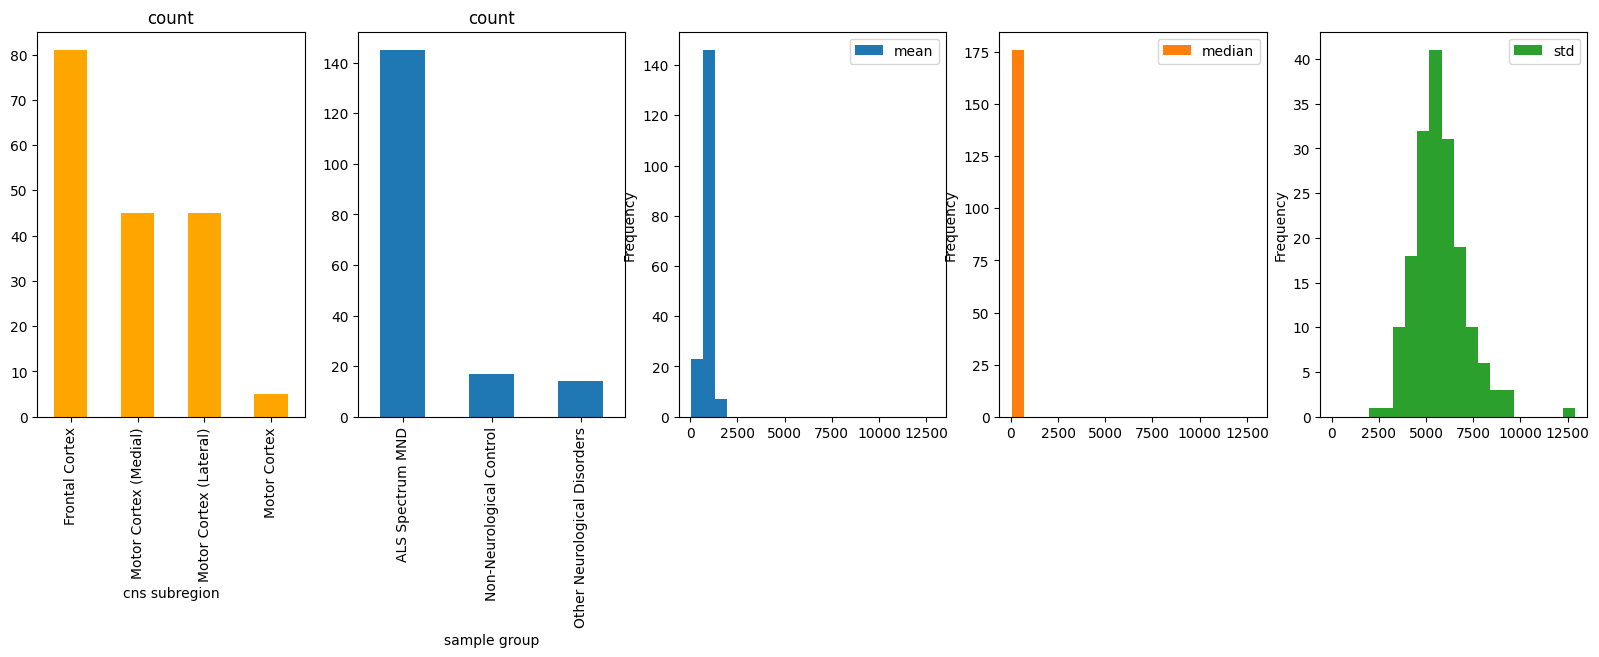

In [18]:
fig, (ax0, ax1, *axes) = plt.subplots(nrows=1,ncols=5, figsize=(20,5))

sample_source = annotations.get_annotations()['cns subregion'].value_counts().plot.bar(ax=ax0, subplots=True, color="orange")
disease_group = annotations.get_annotations()['sample group'].value_counts().plot.bar(ax=ax1, subplots=True)

descriptive_stats_by_samples = samples.get_descriptive_statistics(by_gene=False)
descriptive_stats_by_samples.plot.hist(ax=axes, subplots=True, bins=20)

plt.show()

In [19]:
import pandas as pd
pd.merge(samples.get_samples(), annotations.get_annotations(), left_index=True, right_index=True)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,cns subregion,sample group
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,2137,1265,100,607,140,551,2269,2233,Frontal Cortex,ALS Spectrum MND
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,1908,1072,119,478,129,525,1821,1921,Motor Cortex (Medial),ALS Spectrum MND
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,1345,749,61,341,102,346,1122,1437,Frontal Cortex,ALS Spectrum MND
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,1817,1087,99,527,145,446,1522,1757,Motor Cortex (Medial),ALS Spectrum MND
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,1625,903,96,472,120,415,1556,1768,Motor Cortex (Medial),ALS Spectrum MND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,1319,735,85,394,92,330,1279,1408,Motor Cortex (Medial),ALS Spectrum MND
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,1575,866,76,427,122,430,1478,1660,Frontal Cortex,ALS Spectrum MND
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,1340,693,101,354,83,300,1145,1390,Motor Cortex (Lateral),ALS Spectrum MND
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,1488,869,89,469,99,442,1684,1836,Frontal Cortex,ALS Spectrum MND


<Axes: >

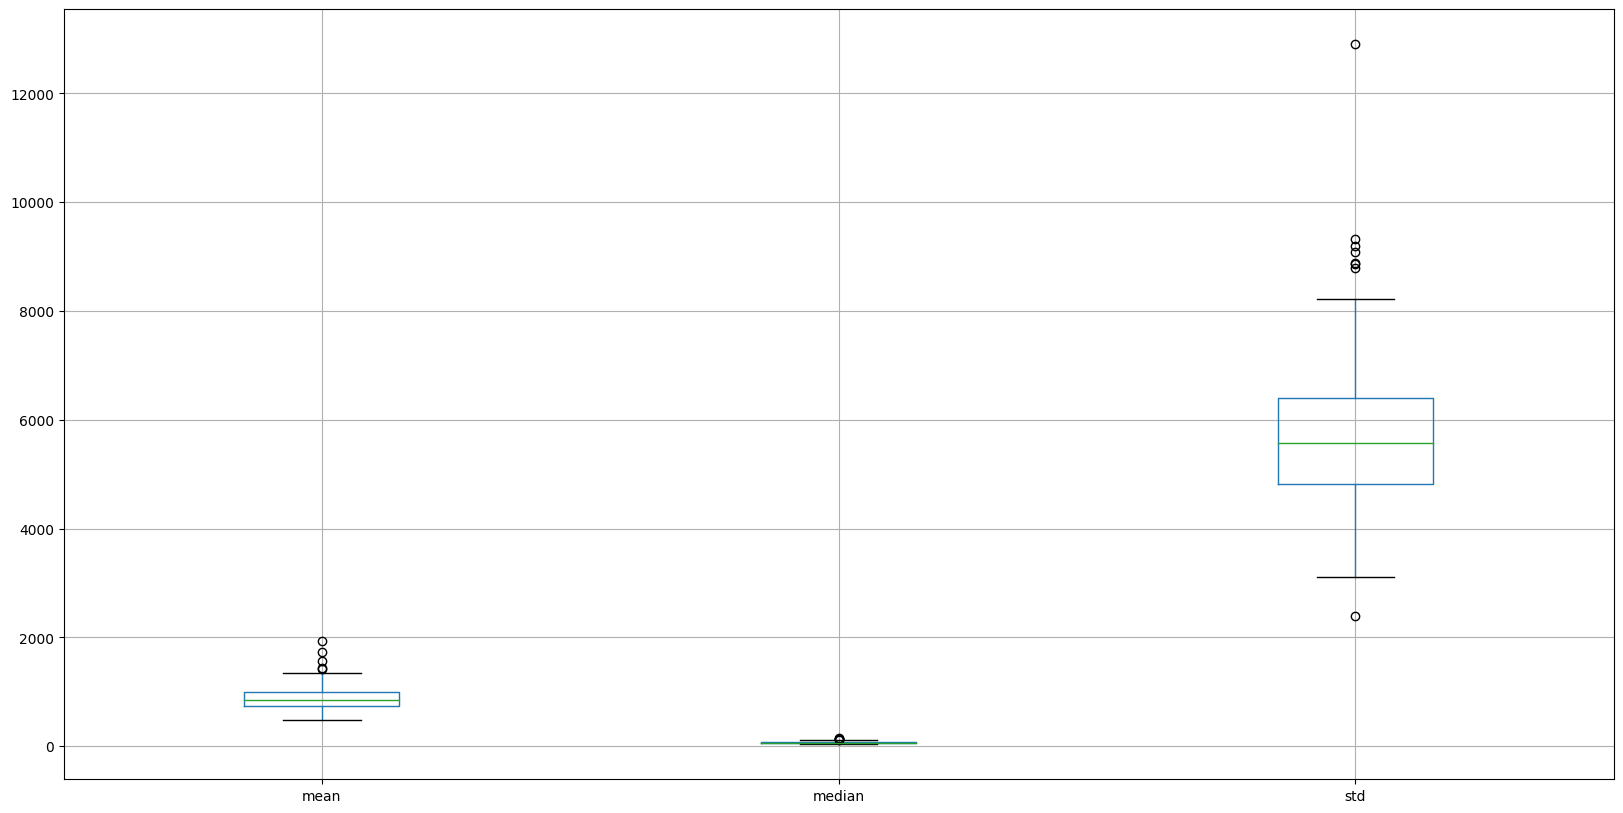

In [20]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

descriptive_stats_by_samples.boxplot()

### RNA Count Description

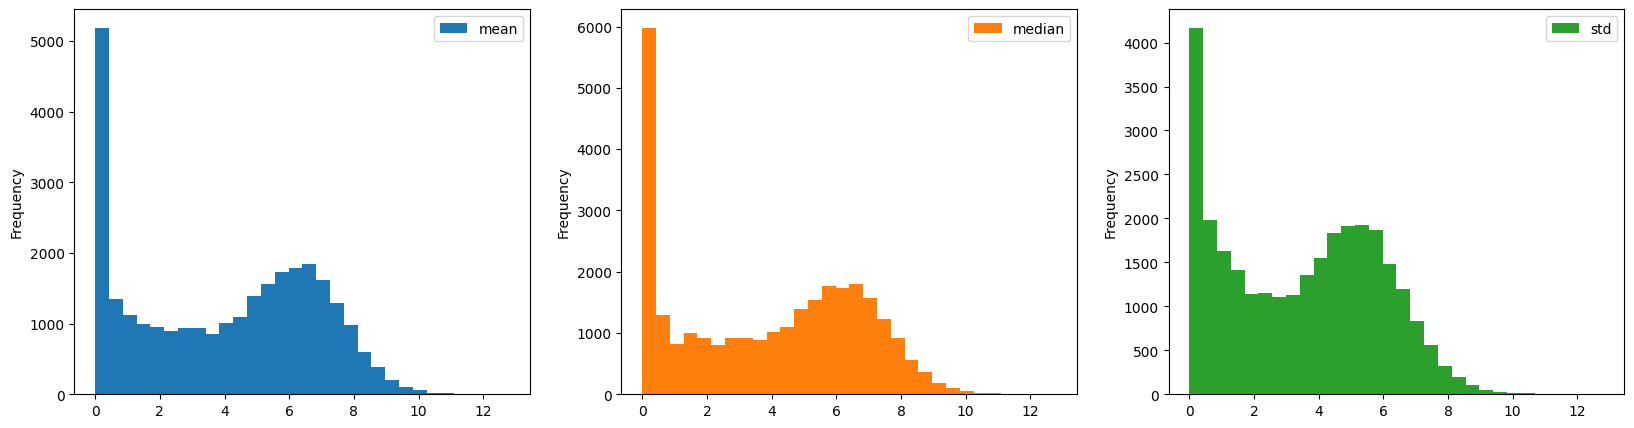

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

descriptive_stats_by_samples = samples.get_descriptive_statistics(by_gene=True)

descriptive_stats_by_samples.plot.hist(subplots=True, bins=30, ax=axes)

plt.show()

## Step 3: PCA

What I'm doing?

So, basically I'm trying to reduce the number of samples because I want to understand the relationships between samples. So I reduce to a small number of dimension and I find the two components with the highest weight.

After that, I plot the results obtained with the new dimensionality reducted data.

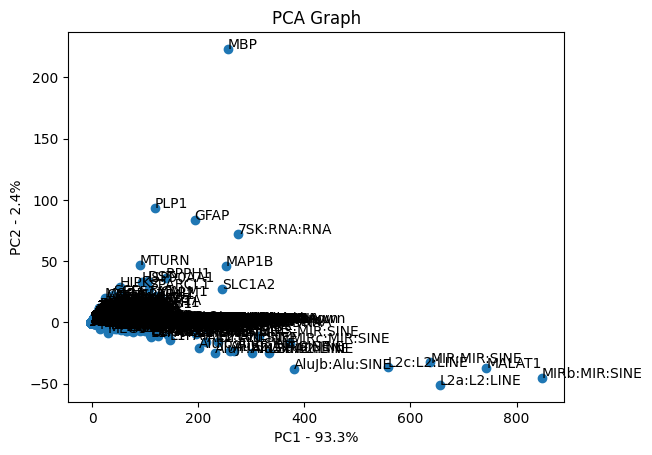

I see how the MBP gene is an outlier. They're between samples.

In [22]:
sequencing.get_genes_counts().T

AttributeError: 'Sequencing' object has no attribute 'get_genes_counts'

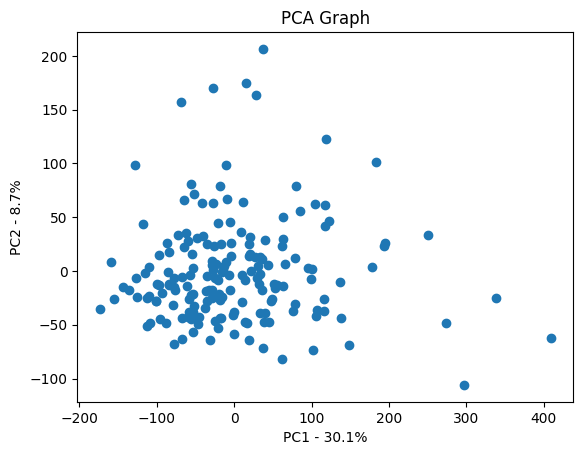

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler2 = StandardScaler()
scaled_genes2 = scaler2.fit_transform(sequencing.get_genes_counts())

pca2 = PCA(n_components=20)
pca2.fit(scaled_genes2)
pca_data2 = pca2.transform(scaled_genes2)



per_var2 = np.round(pca2.explained_variance_ratio_ * 100, decimals=1)
labels2 = [f'PC{x}' for x in range(1, len(per_var2) + 1)]

pca_df2 = pd.DataFrame(pca_data2, index=sequencing.get_genes_counts().index, columns=labels2)

plt.scatter(pca_df2.PC1, pca_df2.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var2[0]))
plt.ylabel('PC2 - {0}%'.format(per_var2[1]))

plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_genes = scaler.fit_transform(sequencing.get_genes_counts().T)

pca = PCA(n_components=20)
pca.fit(scaled_genes)
pca_data = pca.transform(scaled_genes)

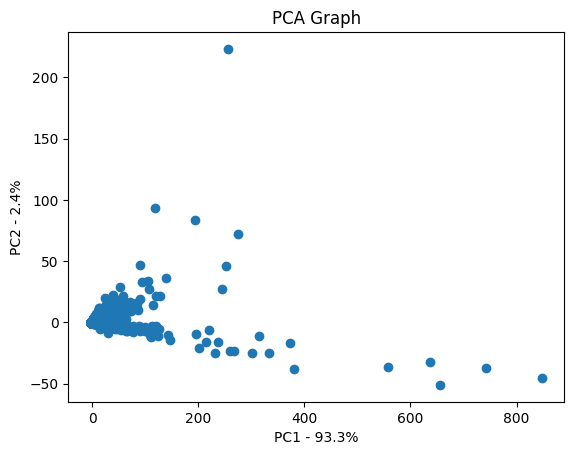

In [47]:
import numpy as np

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [f'PC{x}' for x in range(1, len(per_var) + 1)]

# plt.bar(x=range(1, len(per_var) + 1), height=per_var, )
# plt.ylabel('Percentage of Explained Variance')
# plt.xlabel('Principal Component')
# plt.title('Scree Plot')
# plt.show()

pca_df = pd.DataFrame(pca_data, index=sequencing.get_genes_counts().columns, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

## Step 4: tSNE

In [18]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sequencing.get_genes_counts())
X_embedded.shape

(176, 2)

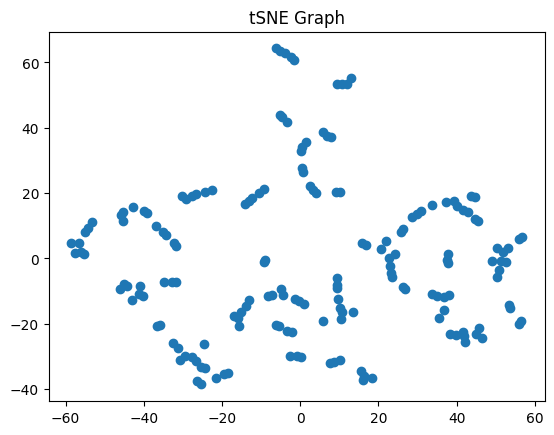

In [43]:
pca_df3 = pd.DataFrame(X_embedded, index=sequencing.get_genes_counts().index)

plt.scatter(pca_df3[0], pca_df3[1])
plt.title('tSNE Graph')
    
plt.show()

## Step 5: Univariate Analysis